In [22]:
import numpy as np
from main import HopfieldNetwork
import matplotlib.pyplot as plt
import random

## Ex 1. Storage capacity in the standard Hopfield network

if overlap = 1, then a pattern has been retrieved

if overlap = 0, then there is no correlation between pattern and state

if overlap = -1, then all the bits are exactly opposite of the pattern (kind of like negative correlation)


### 1.1

In [2]:
P = 5
N = 300

In [3]:
network = HopfieldNetwork(N,P)
#Setting inital state as the first pattern
network.set_states(network.patterns[0].copy())
network.compute_overlap()

[1.0, -0.04, -0.12000000000000001, -0.05333333333333334, 0.0]

In [4]:
t = 5
overlaps = np.zeros((t,P))
print("Overlap with patterns at the inital state")
print(network.overlaps)

Overlap with patterns at the inital state
[1.0, -0.04, -0.12000000000000001, -0.05333333333333334, 0.0]


In [5]:
for step in range(t):
    new_state = network.compute_next_state_fast()
    overlaps[step, :] = network.overlaps

In [6]:
overlaps

array([[ 1.        , -0.04      , -0.12      , -0.05333333,  0.        ],
       [ 1.        , -0.04      , -0.12      , -0.05333333,  0.        ],
       [ 1.        , -0.04      , -0.12      , -0.05333333,  0.        ],
       [ 1.        , -0.04      , -0.12      , -0.05333333,  0.        ],
       [ 1.        , -0.04      , -0.12      , -0.05333333,  0.        ]])

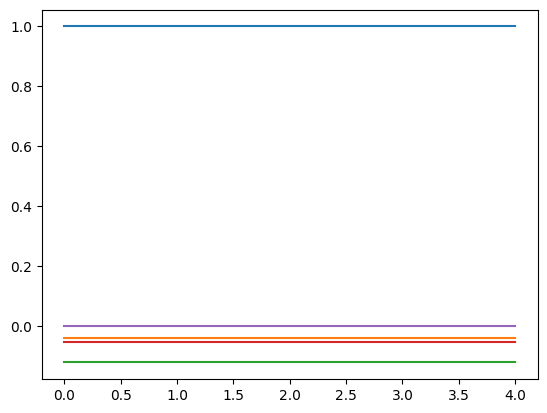

In [7]:
plt.plot(overlaps)

The overlap of the state S(t) with pattern 1 stays constant because the inital state is percisely already a retrieved pattern therefore, it is already in a stable state.

### 1.2

In [8]:
P = 200
N = 300

In [9]:
network = HopfieldNetwork(N,P)
#Setting inital state as the first pattern
network.set_states(network.patterns[0].copy())
network.overlaps = network.compute_overlap()

In [10]:
t = 5
overlaps = np.zeros((t,P))
print("Overlap with patterns at the inital state")
print(network.overlaps)

Overlap with patterns at the inital state
[1.0, -0.12000000000000001, 0.0, 0.04, 0.02666666666666667, -0.02666666666666667, 0.013333333333333334, -0.08, -0.04, 0.04, -0.04, 0.0, -0.06666666666666667, 0.05333333333333334, -0.05333333333333334, -0.013333333333333334, 0.05333333333333334, 0.06666666666666667, -0.04, 0.013333333333333334, 0.0, 0.013333333333333334, -0.02666666666666667, -0.09333333333333334, 0.0, 0.09333333333333334, -0.02666666666666667, 0.0, -0.02666666666666667, 0.05333333333333334, -0.06666666666666667, 0.04, 0.09333333333333334, -0.05333333333333334, 0.0, 0.0, 0.06666666666666667, 0.08, -0.05333333333333334, 0.08, -0.08, 0.06666666666666667, 0.05333333333333334, 0.06666666666666667, -0.02666666666666667, 0.04, 0.05333333333333334, 0.08, 0.0, 0.13333333333333333, -0.02666666666666667, -0.02666666666666667, 0.04, -0.02666666666666667, 0.05333333333333334, 0.02666666666666667, 0.02666666666666667, -0.08, 0.0, 0.04, -0.04, -0.04, 0.02666666666666667, 0.013333333333333334,

In [11]:
for step in range(t):
    curr_state = network.states
    new_state = network.compute_next_state_fast()
    if all(curr_state == new_state):
        print(step)
        print("Converged")
    overlaps[step, :] = network.overlaps

4
Converged


In [12]:
max(overlaps[-1][1:])

0.15333333333333335

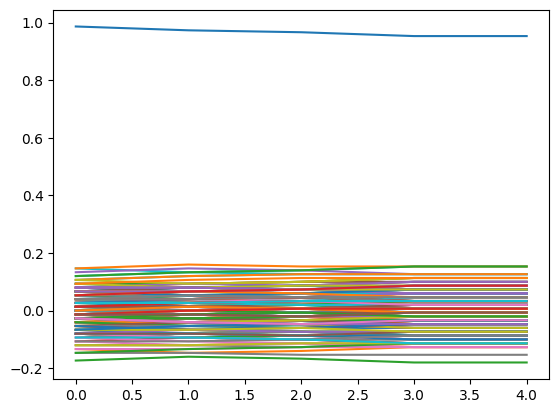

In [13]:
plt.plot(overlaps)

Why does the overlap m1(t) drop below 1? What does the network converge to instead of the first pattern?
Because the number of patterns is approching the number of neurons, this number of patterns is too big for the memory capacity of N neurons, meaning that if the inital state is identical to a pattern it moves away. The patterns become to similar, also making the probability of a flip bigger?, it converges to a state with 2 flipped bits. 

### 1.3 
Plot the overlap with all patterns over the time step t. Why does
the overlap m1(t) increase to 1 across time?

In [8]:
N = 600
P = 20
t = 30

In [ ]:
network = HopfieldNetwork(N,P)
#Setting inital state as the first pattern with 200 bits flipped
initial = network.patterns[0].copy()
N_flipped = 200
random_numbers = random.sample(range(600), N_flipped)
initial[random_numbers] = initial[random_numbers]*-1
network.set_states(initial)
network.compute_overlap()

[0.33333333333333337,
 0.03333333333333333,
 -0.07333333333333333,
 -0.060000000000000005,
 0.12666666666666668,
 0.013333333333333334,
 0.013333333333333334,
 -0.06666666666666667,
 0.013333333333333334,
 -0.03333333333333333,
 0.0,
 0.02666666666666667,
 -0.04666666666666667,
 0.0,
 0.060000000000000005,
 -0.05333333333333334,
 0.0,
 0.013333333333333334,
 -0.05333333333333334,
 -0.02]

In [10]:
overlaps = np.zeros((t,P))
print(network.overlaps)

[0.33333333333333337, 0.03333333333333333, -0.07333333333333333, -0.060000000000000005, 0.12666666666666668, 0.013333333333333334, 0.013333333333333334, -0.06666666666666667, 0.013333333333333334, -0.03333333333333333, 0.0, 0.02666666666666667, -0.04666666666666667, 0.0, 0.060000000000000005, -0.05333333333333334, 0.0, 0.013333333333333334, -0.05333333333333334, -0.02]


In [11]:
for step in range(t):
    new_state = network.compute_next_state_fast()
    overlaps[step, :] = network.overlaps.copy()

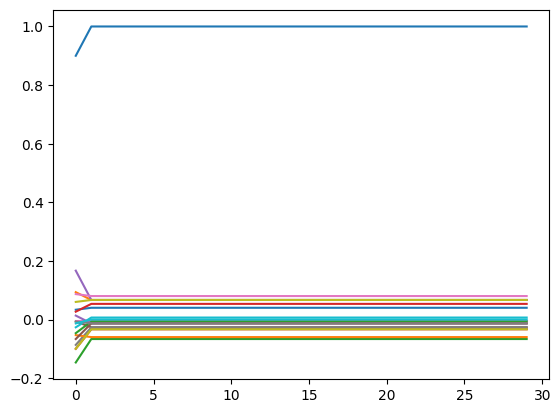

In [12]:
plt.plot(overlaps)

It converges, because the inital state is the most similar to that pattern, so the pattern retrieval will converge towards the most similar patterns, also because N >> P, so there is enough memory capacity

### 1.4 

In [13]:
N = 600
P = 20
t = 30

In [14]:
network = HopfieldNetwork(N,P)
#Setting inital state as the first pattern with 200 bits flipped
initial = network.patterns[0].copy()
N_flipped = 300
random_numbers = random.sample(range(600), N_flipped)
initial[random_numbers] = initial[random_numbers]*-1
network.set_states(initial)
network.compute_overlap()

[0.0,
 -0.06666666666666667,
 0.013333333333333334,
 0.03333333333333333,
 -0.006666666666666667,
 -0.06666666666666667,
 0.0,
 -0.11333333333333334,
 -0.013333333333333334,
 0.0,
 0.006666666666666667,
 0.02,
 0.013333333333333334,
 0.04,
 -0.013333333333333334,
 0.02,
 0.0,
 0.0,
 -0.02,
 -0.04]

In [15]:
overlaps = np.zeros((t,P))
print(network.overlaps)

[0.0, -0.06666666666666667, 0.013333333333333334, 0.03333333333333333, -0.006666666666666667, -0.06666666666666667, 0.0, -0.11333333333333334, -0.013333333333333334, 0.0, 0.006666666666666667, 0.02, 0.013333333333333334, 0.04, -0.013333333333333334, 0.02, 0.0, 0.0, -0.02, -0.04]


In [16]:
for step in range(t):
    new_state = network.compute_next_state_fast()
    overlaps[step, :] = network.overlaps.copy()

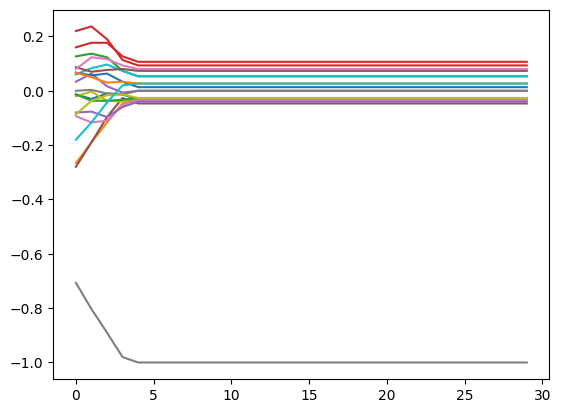

In [18]:
plt.plot(overlaps)

It kinda converges to some steady state around 0.

### 1.5
The size of the 'basin of attraction'

In [3]:
N_flipped = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300]
P = [20, 40, 60]
t = 20
N = 600

In [5]:
results = []
for p in P:
    network = HopfieldNetwork(N,p)
    for_p = {}
    for i in range(p):
        initial = network.patterns[i].copy()
        for_n = {}
        for n in N_flipped:
            random_numbers = random.sample(range(N), n)
            initial[random_numbers] = initial[random_numbers]*-1
            network.set_states(initial)
            network.compute_overlap()
            overlaps = np.zeros((t,p))
            retrived = False
            for step in range(t):
                new_state = network.compute_next_state_fast()
                overlaps[step, :] = network.overlaps.copy()
                if network.overlaps[i]==1:
                    retrived = True
            for_n.update({n:(overlaps, retrived)})
        for_p.update({i:for_n})
    results.append(for_p)

In [14]:
results[0].keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [19]:
plot_data = []
for data in results:
    fractions_per_flipped = {}
    for pattern,value in data.items():
        for n_flipped, output in value.items():
            if fractions_per_flipped.get(n_flipped)==None:
                a = 0
                if output[1]:
                    a = 1
                fractions_per_flipped.update({n_flipped:a})
            else:
                if output[1]:
                    v = fractions_per_flipped.get(n_flipped)
                    fractions_per_flipped.update({n_flipped:v+1})
    plot_data.append(fractions_per_flipped)

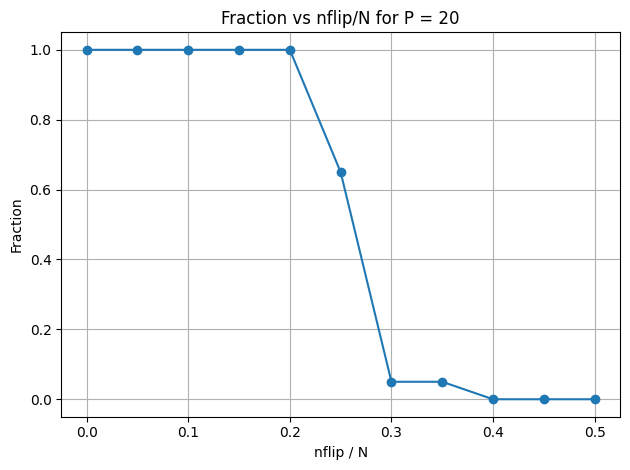

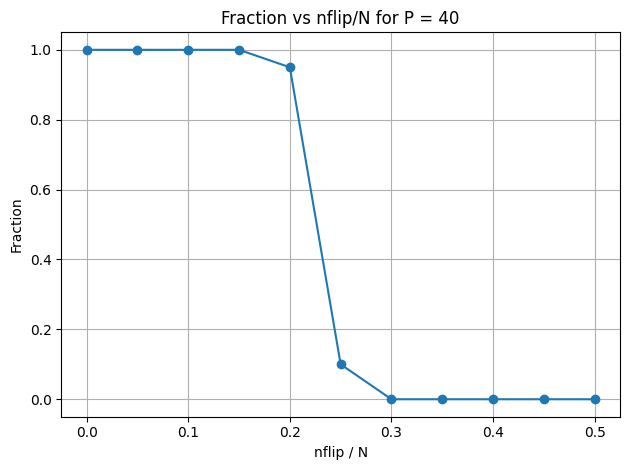

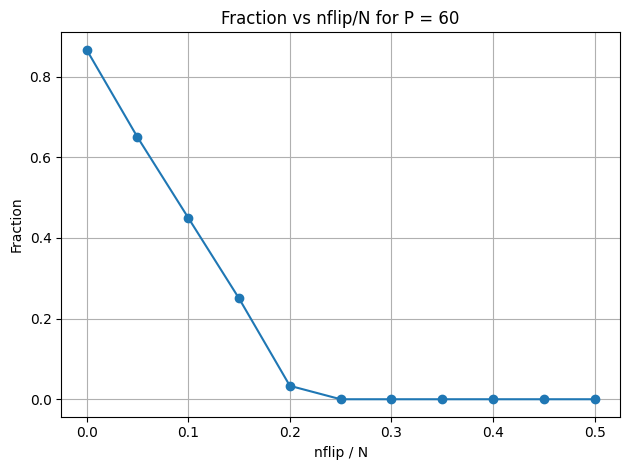

In [26]:
for i in range(len(plot_data)):
    p = P[i]
    data = plot_data[i]
    x= [nflip / N for nflip in data.keys()]
    y = [x/p for x in list(data.values())]
    # Plot
    plt.figure()
    plt.plot(x, y, marker='o')
    plt.title(f'Fraction vs nflip/N for P = {p}')
    plt.xlabel('nflip / N')
    plt.ylabel('Fraction')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### 1.6 
Capacity.

In [27]:
N = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500]

In [28]:
max_P = {}
for n in N:
    P = 0
    retrive = True
    while retrive:
        P += 1
        for p in range(P):
            network = HopfieldNetwork(n,P)
            network.set_states(network.patterns[p].copy())
            network.compute_overlap()
        
            new_state = network.compute_next_state_fast()
            if network.overlaps[p] != 1:
                retrive = False
    max_P.update({n:p-1})


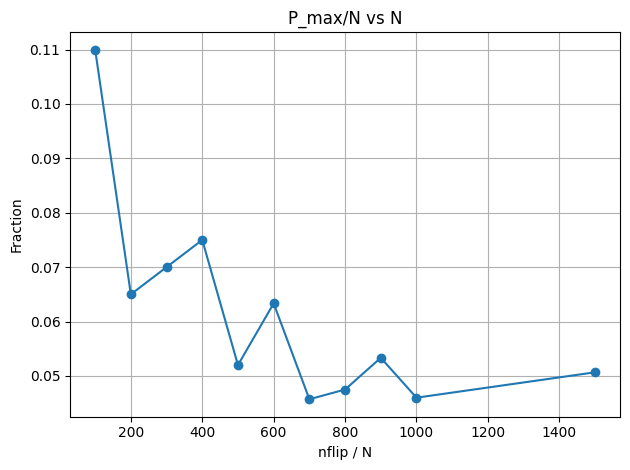

In [ ]:
#plot alpha against N

y = [y/x for x,y in max_P.items()]
x = N
# Plot
plt.figure()
plt.plot(x, y, marker='o')
plt.title(f'P_max/N vs N')
plt.xlabel('nflip / N')
plt.ylabel('Fraction')
plt.grid(True)
plt.tight_layout()
plt.show()

### 2.2

In [23]:
import numpy as np
from main import HopfieldNetwork
import matplotlib.pyplot as plt
import random

In [24]:
N_values = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500]
repeats = 5  # Repeat for averaging

max_P_ex2 = {N: [] for N in N_values}
for n in N_values:
    for r in range(repeats):
        P = 0
        retrieve = True
        while retrieve:
            # increment P,
            P += 1
            #check for all paterns
            for p in range(P):
                network = HopfieldNetwork(n, P, n / 2)
                network.set_states(network.patterns[p].copy())
                network.compute_overlap()

                new_state = network.compute_next_state_sparse()
                if network.overlaps[p] != 1:
                    # overlap between pattern and state no longer 1
                    retrieve = False
                    #get out of the for loop
                    break

        print(f"completed repeat {r}, N {n}")
        max_P_ex2[n].append(P - 1)


completed repeat 0, N 100
completed repeat 1, N 100
completed repeat 2, N 100
completed repeat 3, N 100
completed repeat 4, N 100
completed repeat 0, N 200
completed repeat 1, N 200
completed repeat 2, N 200
completed repeat 3, N 200
completed repeat 4, N 200
completed repeat 0, N 300
completed repeat 1, N 300
completed repeat 2, N 300
completed repeat 3, N 300
completed repeat 4, N 300
completed repeat 0, N 400
completed repeat 1, N 400
completed repeat 2, N 400
completed repeat 3, N 400
completed repeat 4, N 400
completed repeat 0, N 500
completed repeat 1, N 500
completed repeat 2, N 500
completed repeat 3, N 500
completed repeat 4, N 500
completed repeat 0, N 600
completed repeat 1, N 600
completed repeat 2, N 600
completed repeat 3, N 600
completed repeat 4, N 600
completed repeat 0, N 700
completed repeat 1, N 700
completed repeat 2, N 700
completed repeat 3, N 700
completed repeat 4, N 700
completed repeat 0, N 800
completed repeat 1, N 800
completed repeat 2, N 800
completed re

In [25]:
capacity_means = {N:np.mean(fractions)/N for N,fractions in max_P_ex2.items()}
capacity_sterrs = {N:np.std([f/N for f in fractions]) for N,fractions in max_P_ex2.items()}

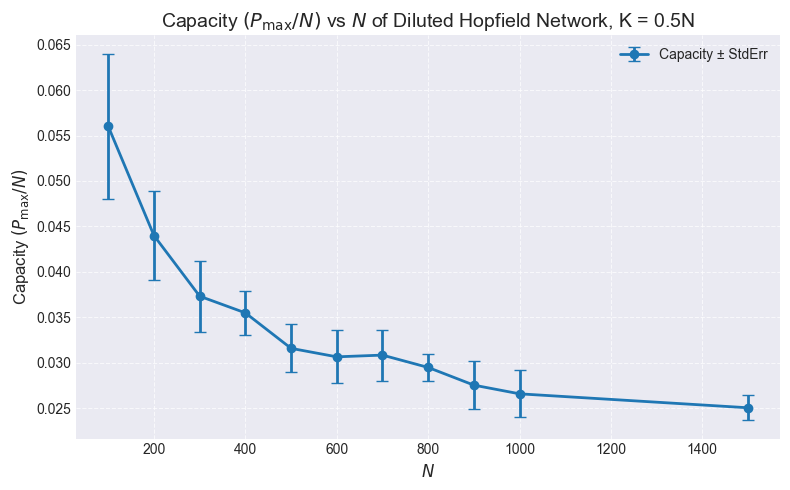

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data - replace these with your actual dictionaries
# capacity_means = {N: np.mean(fractions)/N for N, fractions in max_P_ex2.items()}
# capacity_sterrs = {N: np.std([f/N for f in fractions]) for N, fractions in max_P_ex2.items()}

# Sort the data by N for consistent plotting
sorted_N = sorted(capacity_means.keys())
means = [capacity_means[N] for N in sorted_N]
sterrs = [capacity_sterrs[N] for N in sorted_N]

plt.style.use('seaborn-v0_8-darkgrid')

plt.figure(figsize=(8, 5))
plt.errorbar(
    sorted_N,
    means,
    yerr=sterrs,
    marker='o',
    linestyle='-',
    linewidth=2,
    markersize=6,
    color='tab:blue',
    capsize=4,
    label='Capacity ± StdErr'
)

plt.title(r'Capacity $(P_{\mathrm{max}}/N)$ vs $N$ of Diluted Hopfield Network, K = 0.5N', fontsize=14)
plt.xlabel(r'$N$', fontsize=12)
plt.ylabel(r'Capacity $(P_{\mathrm{max}}/N)$', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.legend()
plt.show()


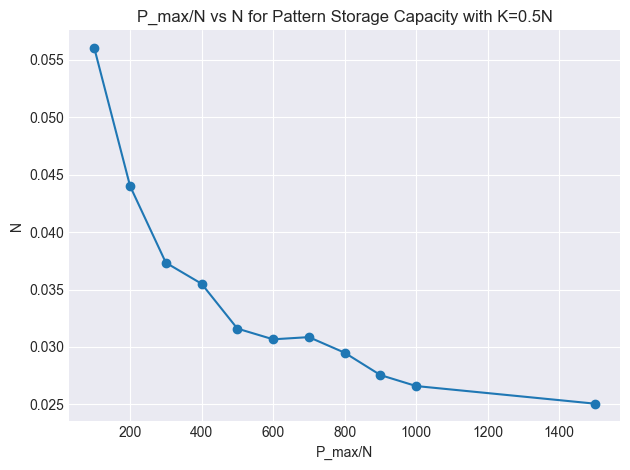

In [27]:
#plot alpha against N

# Plot
plt.figure()
plt.plot(capacity_means.keys(), capacity_means.values(), marker='o')
plt.title(f'P_max/N vs N for Pattern Storage Capacity with K=0.5N')
plt.xlabel('P_max/N')
plt.ylabel('N')
plt.grid(True)
plt.tight_layout()
plt.show()

### 2.3

In [28]:
N = 600  # Number of neurons
T = 30   # Number of update steps
P_values = [15, 20]  # Number of patterns
nflips_range = np.arange(0, 301, 30)
repeats = 5  # Repeat for averaging

In [29]:
# fractions retrieved is keyed by P, each value being a list across N_flipped
fractions_retrieved = {P: [] for P in P_values}
errors = {P: [] for P in P_values}

for P in P_values:
    for N_flipped in nflips_range:
        success_counts = []
        for r in range(repeats):
            network = HopfieldNetwork(N, P, int(N/2))
            success_count = 0
            for mu in range(P):
                # repeat for all patterns
                start_state = network.patterns[mu].copy()
                flip_indices = random.sample(range(N), N_flipped)
                start_state[flip_indices] *= -1
                network.set_states(start_state)
                network.compute_overlap(return_none=True)
                
                for step in range(T):
                    network.compute_next_state_sparse()
                final_state = network.states
                if np.array_equal(final_state, network.patterns[mu]):
                    success_count += 1

            # find success fractin for the N_flipped, P combination
            success_fraction = success_count / P
            success_counts.append(success_fraction)
            print(f"Completed repeat {r}, P {P}, N_flipped {N_flipped}, success fraction {success_fraction}")

        # average over repeats
        mean = np.mean(success_counts)
        stderr = np.std(success_counts) / np.sqrt(repeats)
        fractions_retrieved[P].append(mean)
        errors[P].append(stderr)

Completed repeat 0, P 15, N_flipped 0, success fraction 1.0
Completed repeat 1, P 15, N_flipped 0, success fraction 1.0
Completed repeat 2, P 15, N_flipped 0, success fraction 1.0
Completed repeat 3, P 15, N_flipped 0, success fraction 1.0
Completed repeat 4, P 15, N_flipped 0, success fraction 1.0
Completed repeat 0, P 15, N_flipped 30, success fraction 1.0
Completed repeat 1, P 15, N_flipped 30, success fraction 1.0
Completed repeat 2, P 15, N_flipped 30, success fraction 1.0
Completed repeat 3, P 15, N_flipped 30, success fraction 1.0
Completed repeat 4, P 15, N_flipped 30, success fraction 1.0
Completed repeat 0, P 15, N_flipped 60, success fraction 1.0
Completed repeat 1, P 15, N_flipped 60, success fraction 1.0
Completed repeat 2, P 15, N_flipped 60, success fraction 1.0
Completed repeat 3, P 15, N_flipped 60, success fraction 1.0
Completed repeat 4, P 15, N_flipped 60, success fraction 1.0
Completed repeat 0, P 15, N_flipped 90, success fraction 1.0
Completed repeat 1, P 15, N_f

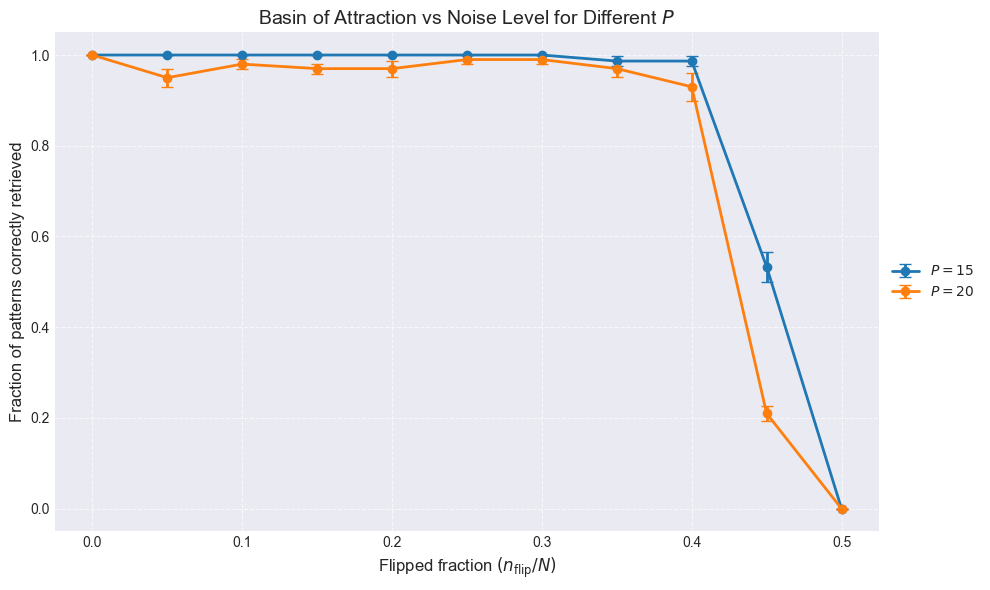

In [30]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')

plt.figure(figsize=(10, 6))
for P in P_values:
    plt.errorbar(
        nflips_range / N,
        fractions_retrieved[P],
        yerr=errors[P],
        label=fr"$P = {P}$",
        capsize=4,
        marker='o',
        linestyle='-',
        linewidth=2,
        markersize=6
    )

plt.xlabel(r"Flipped fraction $(n_{\mathrm{flip}} / N)$", fontsize=12)
plt.ylabel("Fraction of patterns correctly retrieved", fontsize=12)
plt.title("Basin of Attraction vs Noise Level for Different $P$", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5), fontsize=10)
plt.tight_layout()
plt.show()


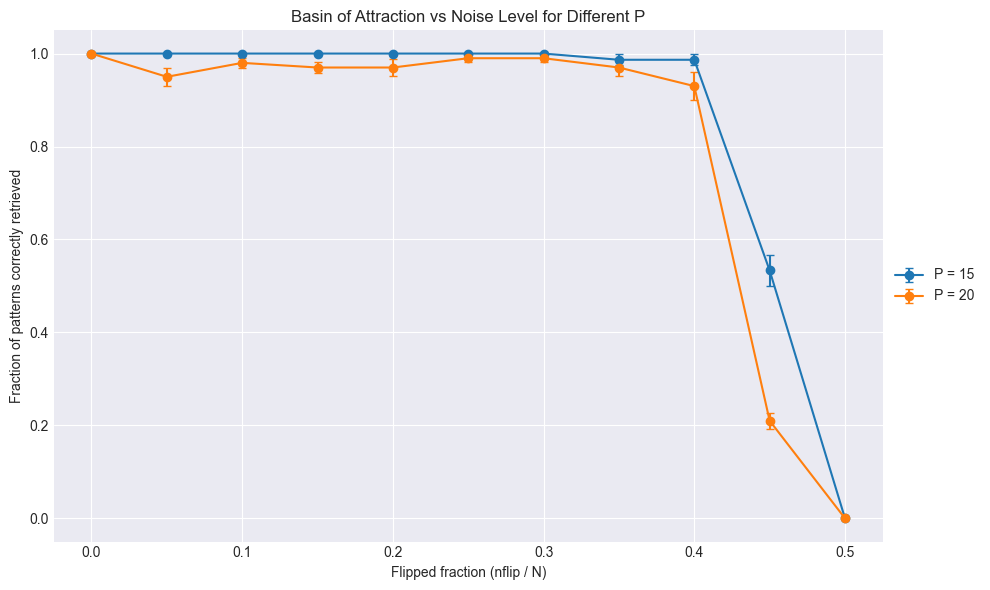

In [31]:
plt.figure(figsize=(10, 6))
for P in P_values:
    plt.errorbar(nflips_range / N, fractions_retrieved[P], yerr=errors[P], label=f"P = {P}", capsize=3, marker='o')

plt.xlabel("Flipped fraction (nflip / N)")
plt.ylabel("Fraction of patterns correctly retrieved")
plt.title("Basin of Attraction vs Noise Level for Different P")
plt.grid(True)
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()

In [10]:
import numpy as np
from main import HopfieldNetwork
import matplotlib.pyplot as plt
import random

In [11]:
import matplotlib.pyplot as plt

def plot_overlaps(overlaps, T, with_legend=True, title=None):
    plt.figure(figsize=(10, 6))
    for mu in range(overlaps.shape[1]):
        plt.plot(overlaps[:, mu], label=f"$m^{{{mu+1}}}(t)$")  # exponent notation using LaTeX

    plt.xlabel("Time step t")
    plt.ylabel(r"Overlap $m^\mu(t)$")  # y-axis label with LaTeX math

    if title:
        plt.title(title)
    else:
        plt.title("Overlap between state and stored patterns over time")

    plt.xticks(range(0, T + 1, 10))  # ticks every 10 steps
    plt.xlim(0, T)

    if with_legend:
        plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

    plt.grid(True)
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()


In [12]:
N = 1000  # Number of neurons
T = 50   # Number of update steps
P = 5  # Number of patterns
betas = (1.5, 2.5, 3.5)

1.0


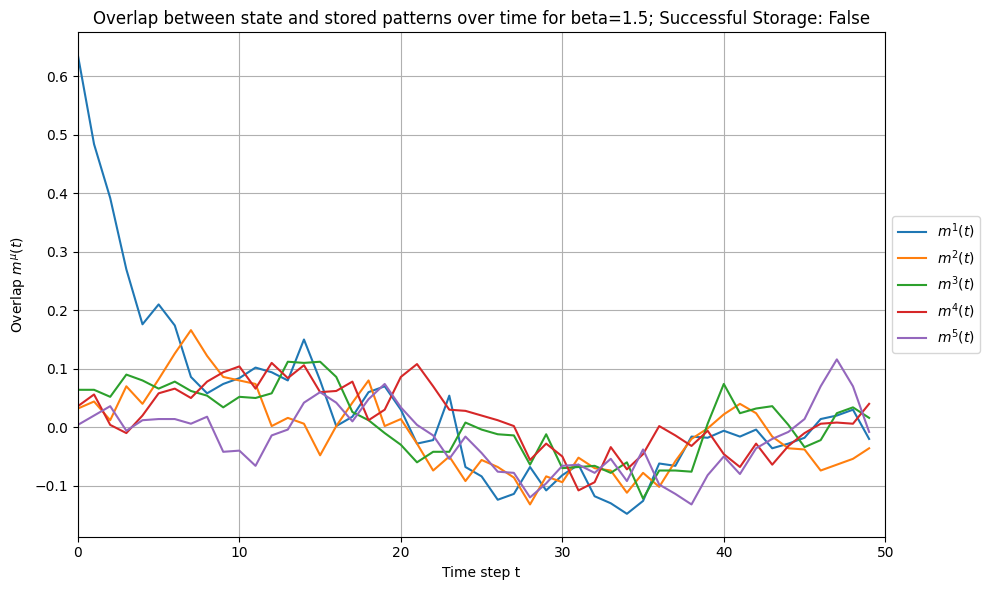

1.0


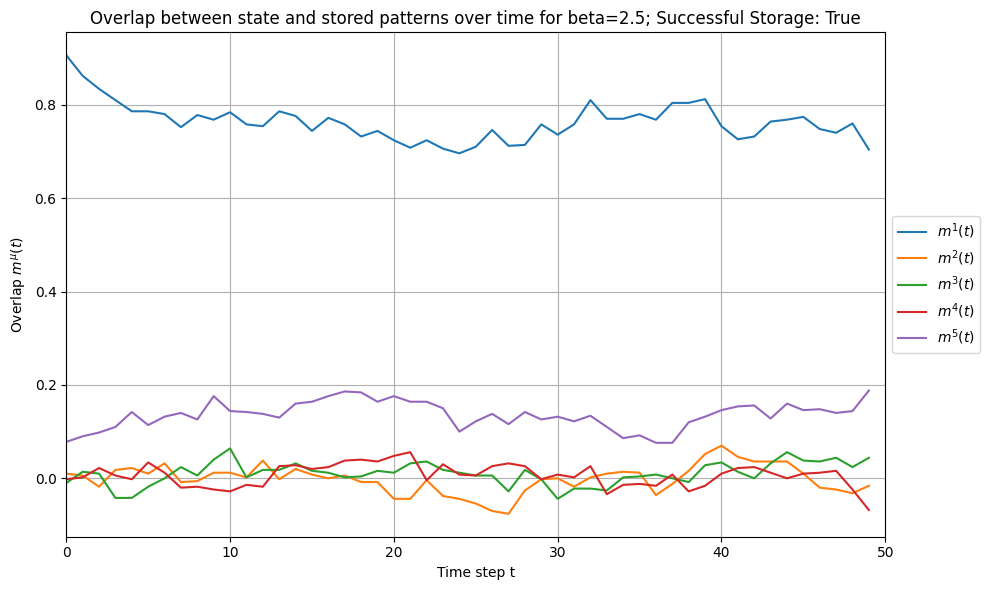

1.0


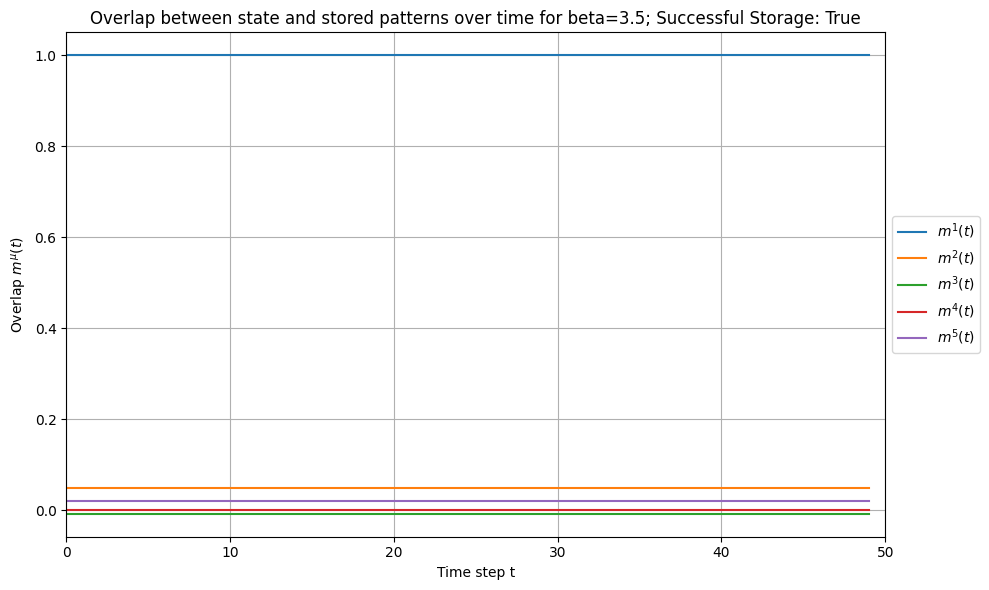

In [13]:
for beta in betas:
    network = HopfieldNetwork(N, P)
    #Setting inital state as the first pattern
    start_state = network.patterns[0].copy()
    start_state[start_state == -1] = 0

    network.set_states(start_state)

    network.compute_overlap(ex3=True)
    print(network.overlaps[0])
    overlaps = np.zeros((T, P))

    for step in range(T):
        network.compute_next_state_ex3(beta)
        overlaps[step, :] = network.overlaps

    is_stored = not np.argmax(np.mean(overlaps[-10:, :], axis=0))
    plot_overlaps(
        overlaps,
        T,
        title=
        f"Overlap between state and stored patterns over time for beta={beta}; Successful Storage: {is_stored}"
    )

In [14]:
repeats = 5  # Repeat for averaging

N = 1000  # Number of neurons
T = 50   # Number of update steps

betas = (1, 1.5, 2, 2.5, 3, 3.5)

In [15]:
def check_within_capacity(overlaps, p):
    """
    As per definition in Note 2, a pattern is stored properly if the average of the last 10 overlaps is at maximum for the first pattern
    """
    
    # if the argmax == p, then the pattern is stored properly
    return not np.argmax(np.mean(overlaps[-10:,:], axis=0)) - p

In [16]:
max_P = {beta: [] for beta in betas}

for r in range(repeats):
    for beta in betas:
        P = 0
        retrieve = True
        while retrieve:
            # increment P
            P += 1

            for p in range(P):
                network = HopfieldNetwork(N, P)
                start_state = network.patterns[p].copy()
                start_state[start_state == -1] = 0
                network.set_states(start_state)
                network.compute_overlap(ex3=True)

                overlaps = np.zeros((T, P))

                for step in range(T):
                    new_state = network.compute_next_state_ex3(beta)
                    overlaps[step, :] = network.overlaps

                if not check_within_capacity(overlaps, p):
                    retrieve = False
                    print(f"Pattern {p} not stored properly for Beta {beta} at repeat {r}, on to the next...")
                    # plot_overlaps(overlaps, T, title=f"Overlap between state and stored pattern={p} over time for beta={beta}")
                    break

        print(f"completed repeat {r}, Beta {beta}: capacity = {P-1}")
        max_P[beta].append(P - 1)


Pattern 0 not stored properly for Beta 1 at repeat 0, on to the next...
completed repeat 0, Beta 1: capacity = 1
Pattern 1 not stored properly for Beta 1.5 at repeat 0, on to the next...
completed repeat 0, Beta 1.5: capacity = 1
Pattern 1 not stored properly for Beta 2 at repeat 0, on to the next...
completed repeat 0, Beta 2: capacity = 2
Pattern 0 not stored properly for Beta 2.5 at repeat 0, on to the next...
completed repeat 0, Beta 2.5: capacity = 13
Pattern 34 not stored properly for Beta 3 at repeat 0, on to the next...
completed repeat 0, Beta 3: capacity = 37
Pattern 21 not stored properly for Beta 3.5 at repeat 0, on to the next...
completed repeat 0, Beta 3.5: capacity = 57
Pattern 0 not stored properly for Beta 1 at repeat 1, on to the next...
completed repeat 1, Beta 1: capacity = 1
Pattern 1 not stored properly for Beta 1.5 at repeat 1, on to the next...
completed repeat 1, Beta 1.5: capacity = 2
Pattern 1 not stored properly for Beta 2 at repeat 1, on to the next...
com

In [19]:
import pickle
# Save the results to a file
with open('max_P_ex3.pkl', 'rb') as f:
    P_max = pickle.load(f)

In [20]:
capacity_means = {beta:np.mean(P_max)/N for beta,P_max in max_P.items()}
capacity_sterrs = {beta:np.std([f/N for f in P_max]) for beta,P_max in max_P.items()}

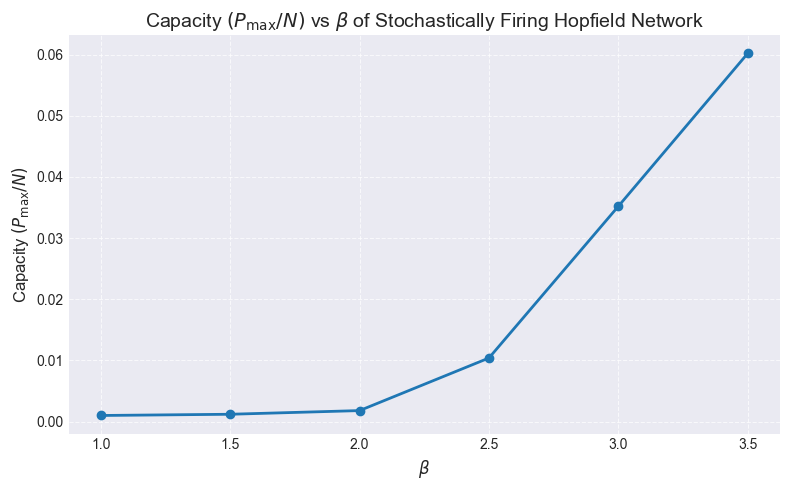

In [21]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')  # or 'ggplot', 'bmh', etc.

plt.figure(figsize=(8, 5))
plt.plot(
    list(capacity_means.keys()),
    list(capacity_means.values()),
    marker='o',
    linestyle='-',
    linewidth=2,
    markersize=6,
    color='tab:blue'
)

plt.title(r'Capacity $(P_{\mathrm{max}}/N)$ vs $\beta$ of Stochastically Firing Hopfield Network', fontsize=14)
plt.xlabel(r'$\beta$', fontsize=12)
plt.ylabel(r'Capacity $(P_{\mathrm{max}}/N)$', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
# Prepare the data
capacities = [max_P[beta] for beta in betas]

# Create the boxplot
plt.boxplot(capacities, positions=betas, widths=0.2)
plt.xticks(betas)  
plt.xlabel('Betas')
plt.ylabel('Capacities')
plt.title('Capacity vs Beta for N=1000 Stochastically Firing Hopfield Network')

plt.show()

In [ ]:
N = 1000
P = 5
beta = 7
T = 50

network = HopfieldNetwork(N,P)
#Setting inital state as the first pattern
start_state = network.patterns[0].copy()
start_state[start_state == -1] = 0
network.set_states(start_state)

network.compute_overlap(ex3=True)

overlaps = np.zeros((T,P))

for step in range(T):
    network.compute_next_state_ex3(beta, implement_refractory=True)
    overlaps[step, :] = network.overlaps

is_stored = not np.argmax(np.mean(overlaps[-10:,:], axis=0))
plot_overlaps(overlaps, T, title=f"Overlap between state and stored patterns over time for beta={beta}; Successful Storage: {is_stored}")

In [17]:
#smart initialization 3.5
#So because the issue is that the network will after the first time step get into 0 and then its random from then on, so what if we initialized the network with the first pattern, but with a small amount of firing neurons initilized as 0. The question is how many neurons is the smallest possible amount that still allow the network to retrieve the pattern.

In [ ]:
N = 1000
P = 5
beta = 5
T = 50
#with the smart initialization
network = HopfieldNetwork(N,P)
#Setting inital state as the first pattern
start_state = network.patterns[0].copy()
start_state[start_state == -1] = 0
network.set_states(start_state)

network.compute_overlap(ex3=True)

overlaps = np.zeros((T+1,P))
states_per_t = np.zeros((T+1, N))
states_per_t[0, :] = start_state.copy()

for step in range(T+1):
    network.compute_next_state_ex3(beta, implement_refractory=True)
    overlaps[step+1, :] = network.overlaps
    states_per_t[step+1, :] = network.states

is_stored = not np.argmax(np.mean(overlaps[-10:,:], axis=0))
plot_overlaps(
    overlaps,
    T+1,
    title=
    f"Overlap between state and stored patterns over time for beta={beta}; Successful Storage: {is_stored}"
)

In [ ]:
#plot states 
import numpy as np
import matplotlib.pyplot as plt

# Example binary data: shape (T, N)

plt.figure(figsize=(10, 5))

for neuron in range(N):
    spike_times = np.where(states_per_t[:, neuron] == 1)[0]
    plt.vlines(spike_times, neuron + 0.5, neuron + 1.5, color='black', linewidth=1)

plt.xlabel("Time step")
plt.ylabel("Unit index")
plt.yticks(range(1, N + 1))
plt.title("Spike Raster Plot")
plt.ylim(0.5, N + 0.5)
plt.tight_layout()
plt.show()
